In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 92 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (92/92), 324.04 KiB | 5.23 MiB/s, done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


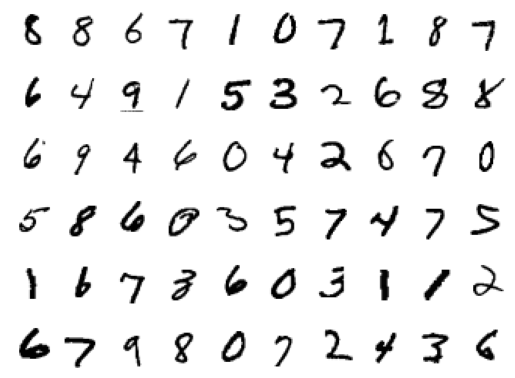

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_3,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_3().to(device)
Net_3.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
            Conv2d-2           [-1, 16, 28, 28]           1,168
           Dropout-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5            [-1, 8, 14, 14]           1,160
            Conv2d-6            [-1, 8, 14, 14]             584
         MaxPool2d-7              [-1, 8, 7, 7]               0
           Dropout-8              [-1, 8, 7, 7]               0
            Conv2d-9             [-1, 16, 5, 5]           1,168
           Conv2d-10              [-1, 8, 3, 3]           1,160
           Conv2d-11             [-1, 10, 1, 1]             730
Total params: 6,050
Trainable params: 6,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=0.48033270239830017 Batch_id=468 Accuracy=54.21: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]



Test set: Average loss: 0.3110, Accuracy: 9313/10000 (93.13%)

EPOCH: 1


Loss=0.2565325200557709 Batch_id=468 Accuracy=91.47: 100%|██████████| 469/469 [00:19<00:00, 24.09it/s]



Test set: Average loss: 0.1409, Accuracy: 9687/10000 (96.87%)

EPOCH: 2


Loss=0.2252802848815918 Batch_id=468 Accuracy=93.99: 100%|██████████| 469/469 [00:19<00:00, 23.77it/s]



Test set: Average loss: 0.1154, Accuracy: 9776/10000 (97.76%)

EPOCH: 3


Loss=0.12841291725635529 Batch_id=468 Accuracy=95.08: 100%|██████████| 469/469 [00:17<00:00, 26.60it/s]



Test set: Average loss: 0.1192, Accuracy: 9726/10000 (97.26%)

EPOCH: 4


Loss=0.03597377985715866 Batch_id=468 Accuracy=95.81: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]



Test set: Average loss: 0.0840, Accuracy: 9780/10000 (97.80%)

EPOCH: 5


Loss=0.11148160696029663 Batch_id=468 Accuracy=96.21: 100%|██████████| 469/469 [00:18<00:00, 25.86it/s]



Test set: Average loss: 0.0873, Accuracy: 9777/10000 (97.77%)

EPOCH: 6


Loss=0.02215859480202198 Batch_id=468 Accuracy=96.52: 100%|██████████| 469/469 [00:19<00:00, 24.16it/s]



Test set: Average loss: 0.0962, Accuracy: 9730/10000 (97.30%)

EPOCH: 7


Loss=0.12088971585035324 Batch_id=468 Accuracy=96.64: 100%|██████████| 469/469 [00:17<00:00, 26.32it/s]



Test set: Average loss: 0.0685, Accuracy: 9806/10000 (98.06%)

EPOCH: 8


Loss=0.07995586842298508 Batch_id=468 Accuracy=96.83: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]



Test set: Average loss: 0.0739, Accuracy: 9795/10000 (97.95%)

EPOCH: 9


Loss=0.0519309937953949 Batch_id=468 Accuracy=96.83: 100%|██████████| 469/469 [00:18<00:00, 26.02it/s]



Test set: Average loss: 0.0983, Accuracy: 9725/10000 (97.25%)

EPOCH: 10


Loss=0.1320074200630188 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:20<00:00, 23.03it/s]



Test set: Average loss: 0.0929, Accuracy: 9753/10000 (97.53%)

EPOCH: 11


Loss=0.0424758680164814 Batch_id=468 Accuracy=97.15: 100%|██████████| 469/469 [00:17<00:00, 26.58it/s]



Test set: Average loss: 0.0548, Accuracy: 9854/10000 (98.54%)

EPOCH: 12


Loss=0.069540835916996 Batch_id=468 Accuracy=97.18: 100%|██████████| 469/469 [00:18<00:00, 24.82it/s]



Test set: Average loss: 0.0589, Accuracy: 9840/10000 (98.40%)

EPOCH: 13


Loss=0.07762423157691956 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:18<00:00, 25.03it/s]



Test set: Average loss: 0.0650, Accuracy: 9823/10000 (98.23%)

EPOCH: 14


Loss=0.09565267711877823 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:19<00:00, 24.67it/s]



Test set: Average loss: 0.0674, Accuracy: 9821/10000 (98.21%)



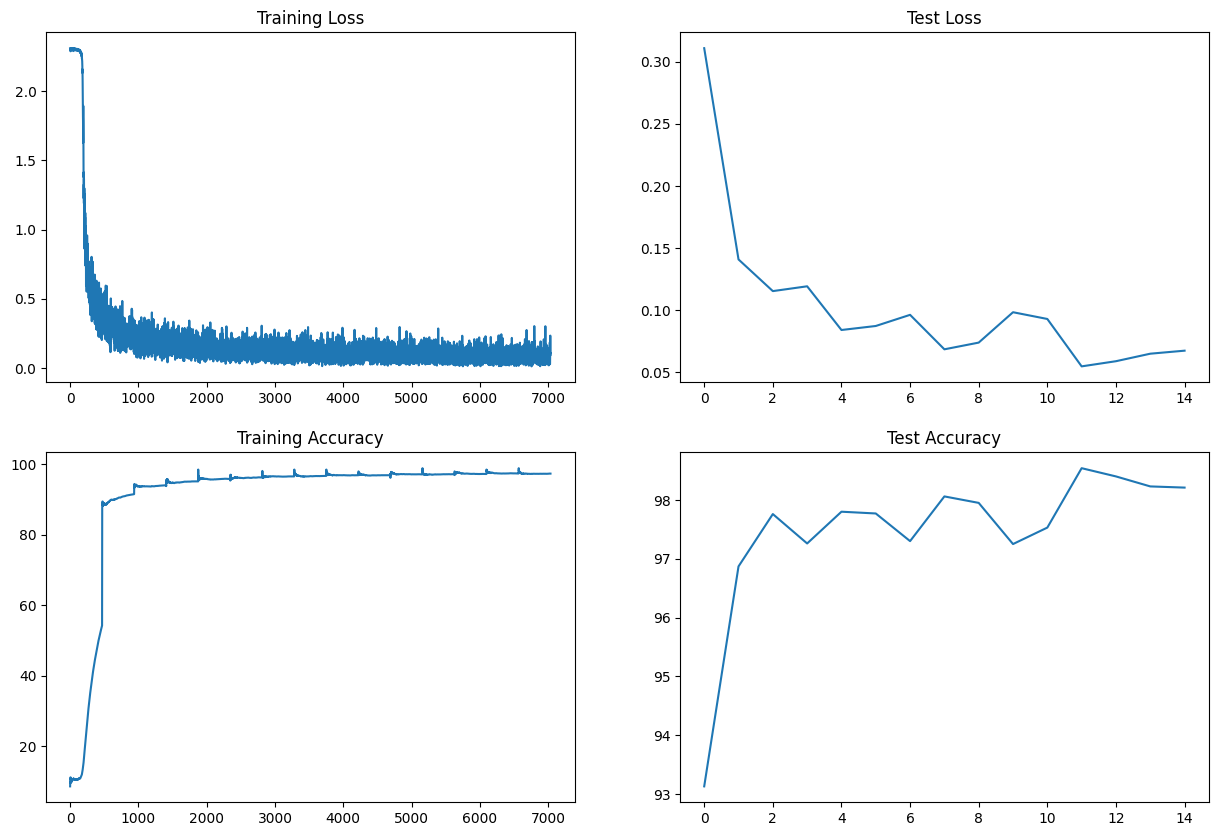

In [9]:
from model import draw_graph

draw_graph()